# Worksheet 1 - Scientific Visualization MVE080/MMG640
## Basics in Python, Jupyter, plotnine and how to visualize amounts

Name: Axel Eiman

This is the first worksheet in the course *Scientific Visualization*. This Jupyter notebook has three functions:

1. It describes the tasks.
2. It (sometimes) provides coding templates that you can use as a basis for your own code.
3. It is a template also for the report that you upload in Canvas.

The tasks are of various types: some are to read some text and then comment on it (no coding), and some are about creating visualizations using plotnine.
Once you're finished with all the tasks, export this document as an HTML-file and upload it in Canvas.
You are encouraged to discuss problems and solutions with your fellow students (in the class-room but also on CampusWire), but each student must solve all tasks by themselves and hand-in their own report.
Notice that Jupyter notebooks use [Markdown](https://docs.github.com/en/github/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links) for writing text cells. Make sure you understand the basics. Later on you can also include $\LaTeX$ in your Markdown cells.

Throughout the assignment you shall use a Python workflow.
If you are completely new to Python, take a look at [this page](pythonbasics.org).
Python can do essentially all that MATLAB can, plus more. 
In this course we shall use Python in different contexts, starting with the [Jupyter Notebook interface](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html). 

Matrices and arrays are handled through the NumPy module. [Learn here](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html) how NumPy is different from MATLAB.

The below loads the packages required for this homework.

In [503]:
import numpy as np
import pandas as pd
from plotnine import *
from plotnine.data import mtcars # Classic example data set 

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Task 1

Read Chapter 1-3 of [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/), then answer the questions below.

### Question 1.1
Describe the visualization concept _scales_. 

### Answer 1.1
Scales are how we connect between data and aesthetics. We can use position scales, shape scales, or color/intensity scales. The scales are what determine what the positions, shapes, or colors mean respectively for the data we are visualizing. 

### Question 1.2
In Figures 2.3 and 2.4 the same data is visualized in two different ways. Discuss the pros and cons of the two approaches. Which one do you prefer and why?

### Answer 1.2
In the curve plot in figure 2.3 it is easy to read the temperature values for each location, and we can follow how the temperature changes during each month. In figure 2.4, we lose some of the information when averaging over the months. Since temperature is a continuous variable, it is easier to interpret when mapped to a position scale. This together with the fact that we lose some information by averaging is why I prefer figure 2.3.

### Question 1.3
Describe situations when _nonlinear axes_ might be useful.
When should they not be used?

### Answer 1.3
Nonlinear axes can be useful when the data is nonlinear. For example, using a logarithmic scale is useful when the data is exponential or the data is obtained from multiplication or division. They should not be used when the x and y axes are measured in the same units.

### Question 1.4
In which situations could a _polar coordinate system_ be useful? 

### Answer 1.4
Polar coordinate systems are useful when working with data of periodic nature, where the end of the scale can be joined with the beginning essentially. When relating to geometric shapes like circles, cylinders etc. polar coordinates make sense of course, but also with things like the days of a year.


## Task 2 - Tidy data, ggplot and distributions

Several graphics libraries such as ggplot2 and plotnine are at their best when the provided data is tidy. However, data is often not provided in a tidy format, hence being able to transform non-tidy data into tidy data is a crucial skill. 

### Question 2.1 

In the lecture I provided a small non-tidy dataset (code below).

In [504]:
data1 = pd.DataFrame({"Site" : ["Stockholm", "Gothenburg", "London"], 
                      "1999" : [13, 85, 77], 
                      "2000" : [21, 31, 15]})
data1

,Site,1999,2000
0,Stockholm,13,21
1,Gothenburg,85,31
2,London,77,15


Transform this small dataset into a tidy dataset. Print the table below (as I did above). 

*Hint* [wide_to_long](https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html)

In [505]:
# Insert code here 
# Remember to print the table
data1 = data1.melt(id_vars=["Site"], value_vars=["1999", "2000"])
data1

,Site,variable,value
0,Stockholm,1999,13
1,Gothenburg,1999,85
2,London,1999,77
3,Stockholm,2000,21
4,Gothenburg,2000,31
5,London,2000,15


### Question 2.2

Datasets are often bigger than above. I have made a subset of the weather data used in the lecture non-tidy (available on the webpage). 

In [506]:
# If you have the data in the same directory as your notebook you can use 
# path_data = "Weather_not_tidy.csv"
path_data = "Weather_not_tidy.csv"
data_not_tidy = pd.read_csv(path_data)
data_not_tidy


,month,day,Temp2009,hour_of_day,Temp2010
0,Jan,1,-0.9,12,-6.4
1,Jan,2,-2.2,12,-6.6
2,Jan,3,4.2,12,-7.4
3,Jan,4,-4.7,12,0.2
4,Jan,5,-7.8,12,-7.3
...,...,...,...,...,...
360,Dec,27,2.3,12,-6.8
361,Dec,28,-0.8,12,-11.0
362,Dec,29,1.4,12,-10.6
363,Dec,30,-5.5,12,-3.0


Transform this dataset into a tidy dataset. Print the table below (as I did above)

In [507]:
# Insert code here 

# Remember to print the table
weather_tidy = data_not_tidy.melt(id_vars=["month", "day", "hour_of_day"], value_vars=["Temp2009", "Temp2010"], var_name='year')
weather_tidy

,month,day,hour_of_day,year,value
0,Jan,1,12,Temp2009,-0.9
1,Jan,2,12,Temp2009,-2.2
2,Jan,3,12,Temp2009,4.2
3,Jan,4,12,Temp2009,-4.7
4,Jan,5,12,Temp2009,-7.8
...,...,...,...,...,...
725,Dec,27,12,Temp2010,-6.8
726,Dec,28,12,Temp2010,-11.0
727,Dec,29,12,Temp2010,-10.6
728,Dec,30,12,Temp2010,-3.0


## Distributions

For this part reading Chapter 7 and 9 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) helps.

## Question 3.1

The benefit with tidy data is that it is easy to work with. For this task use the tidy weather dataset from above and choose three months and by **a density and histogram plot** visualize the differences in temperature between 2009 and 2010 for the chosen months in a readable manner. Make sure to print the visuals below. 

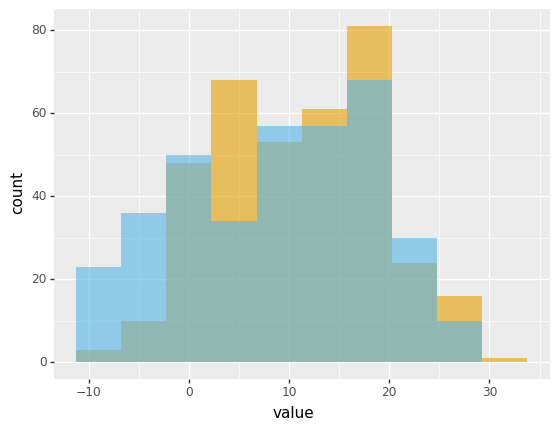

<ggplot: (123901148139)>

In [508]:
# Insert code here for histogram
%matplotlib inline
x1 = weather_tidy.loc[weather_tidy["year"] == "Temp2009"]
x2 = weather_tidy.loc[weather_tidy["year"] == "Temp2010"]

(
ggplot(data = weather_tidy)
+ geom_histogram(aes(x='value'), fill=cbPalette[0], alpha=0.6, data=x1, bins=10)
+ geom_histogram(aes(x='value'), fill=cbPalette[1], alpha=0.6, data=x2, bins=10)
)
# Remember to print the visual 

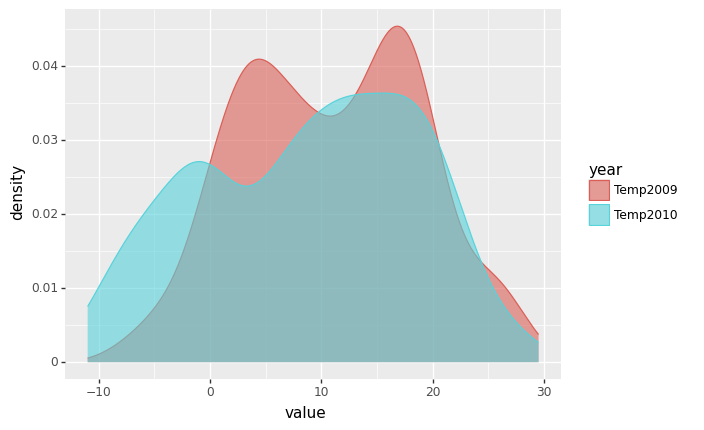

<ggplot: (123901815971)>

In [509]:
# Insert code here for density plot

# Remember to print the visual 
(
    ggplot(weather_tidy, aes(x='value', color='year', fill='year'))
    + geom_density(alpha=0.6)
)

Provide a brief motivation for which plot (density and histogram) you find most readable.



I find the density plot to be more readable than the histogram. The area where the histograms overlap looks almost like its own entity rather than just the intersection of the two histograms. The density plot does not share this problem as the contouring curves are more distinct and easier to follow. 

### Question 3.2

In Lecture2 I used boxplots, error-bars, and violin plots to visualize fluctuations in winter temperature in Västerås. Now using the weather data above plot the temperature per month (like in Fig. 9.8 [here](https://clauswilke.com/dataviz/boxplots-violins.html)) using error-bars, boxplots and violin plots with data points. For each month plot the temperature for 2009 and 2010 next to each other (see example on webpage). 

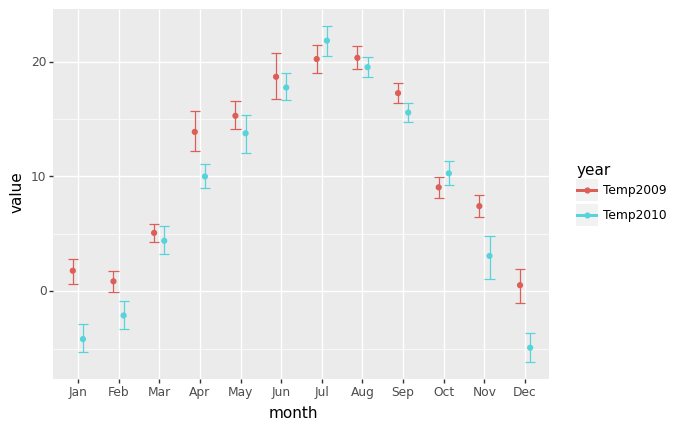

<ggplot: (123901092241)>

In [510]:
# Insert code here using standard error

# Remember to print the visual 
(
    ggplot(weather_tidy, aes(x='month', ymax='value', ymin='value', color='year'))
    + geom_point(aes(y='value'), stat='summary', position=position_dodge(width=0.5))
    + geom_errorbar(aes(y='value'), stat='summary', position=position_dodge(width=0.5))
    + scale_x_discrete(limits=weather_tidy["month"].unique())
)

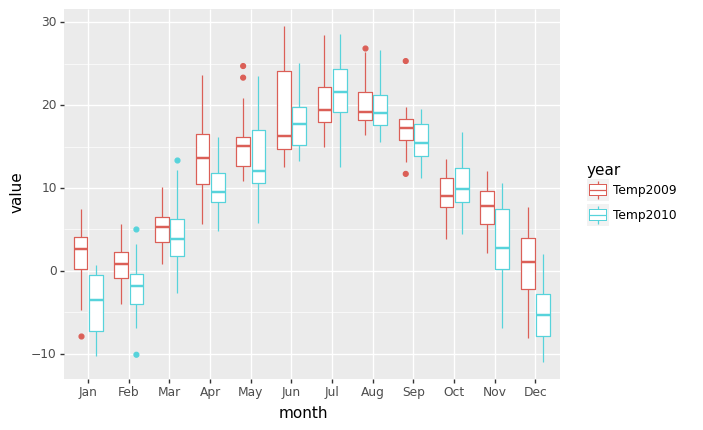

<ggplot: (123915018975)>

In [511]:
# Insert code here using boxplots

# Remember to print the visual 
(
    ggplot(weather_tidy, aes(x='month', y='value', color='year'))
    + geom_boxplot()
    + scale_x_discrete(limits=weather_tidy["month"].unique())
)

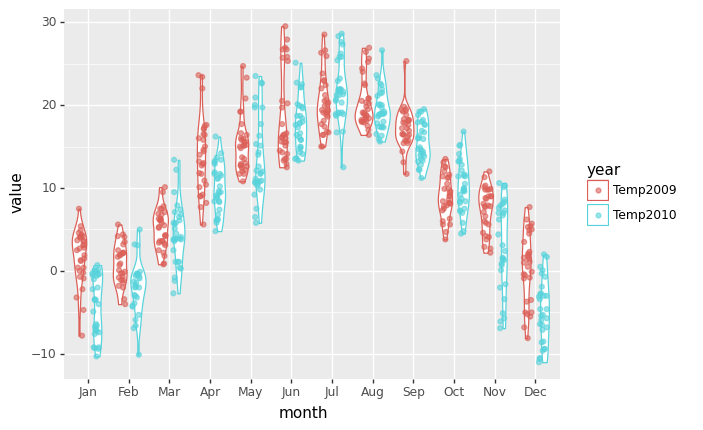

<ggplot: (123918083916)>

In [512]:
# Insert code here using violin plot with dots

# Remember to print the visual 
(
    ggplot(weather_tidy, aes(x='month', y='value', color='year'))
    + geom_violin()
    + geom_point(position=position_jitterdodge(jitter_width=0.2), alpha=0.6) # aes(x=stage(after_stat='color', after_scale='x'))
    #+ geom_jitter(position="dodge")
    + scale_x_discrete(limits=weather_tidy["month"].unique())
)


Briefly discuss the drawback with each approach (standard errors, boxplots, and violin plots). 

__Write answer here__

The plot with standard errors only shows the mean and where one standard deviation from the mean is, which is relatively uninformative compared to the other approaches. However, they are easy to read and understand. Boxplots provide more information with the percentile markings and are still quite easy to comprehend. The violin plots give a more detailed view of the distribution than the other approaches, but can be percieved as a bit more cluttered. Both standard error and boxplots can be decieving when the distributions are not normal, or a mix of several normal distributions for example. Boxplots are better than standard error for dealing with this, but not as optimal as violin plots.

### Question 3.3

Some people argue that visuals should be as minimal as possible. On the webpage you have a bad example of a minimalist way to plot the min, median, and max temperature of each month in 2009 and 2010 using the dataset in Question 3.2 (where you hopefully have filtered out daily temperatures for 2009 and 2010). By **only** using geom\_point recreate the visual (you do not need to recreate the title). **You are not allowed to transform the dataset**.

*Hint - Remember the stat argument in ggplot*

In [513]:
# Insert code here 
# Remember to print the visual 

### Question 3.4

Using the full weather dataset on the webpage create two plots of your on choice. For example, you can compare winter temperatures across years, differences in night and day temperatures etc. For each visual provide a brief motivation on why your choice of visual (e.g violin or boxplot) is a good choice.

In [514]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

In [515]:
# Insert code here 
# Remember to print the visual 

*Brief motivation*

## Amounts 

For this part reading Chapter 6 in [Fundamentals of Data Visualizations](https://clauswilke.com/dataviz/) can help.

### Question 4.1 

Barplots are the workhorse for plotting amounts. Create a dataframe with the values from Tab. 6.1 in the [course book](https://clauswilke.com/dataviz/visualizing-amounts.html), and recreate Fig. 6.1 and Fig. 6.3 in the course book.

In [516]:
tab61 = pd.DataFrame({
        'Rank': [1,2,3,4,5],
        'Title': ['Star Wars: The Last Jedi', 'Jumanju: Welcome to the Jungle', 'Pitch Perfect 3', 'The Greatest Showman', 'Ferdinand'],
        'Weekend Gross': [71565498, 36169328, 19928525, 8805843, 7316746]
    })

<class 'pandas.core.frame.DataFrame'>


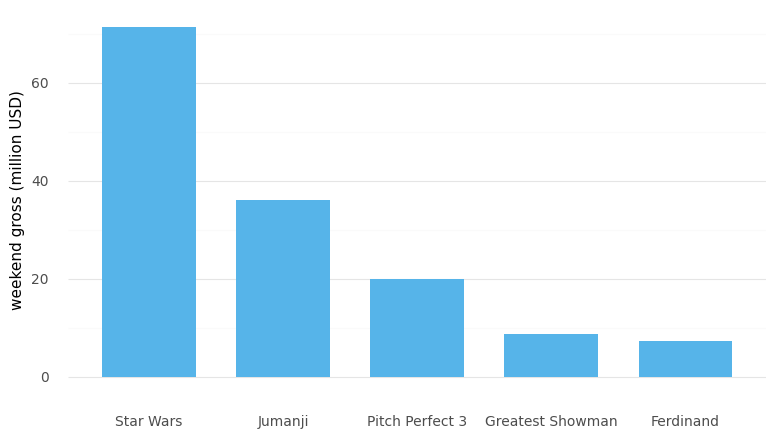

<ggplot: (123917949573)>

In [517]:
# Insert code here for Fig. 6.1
# Remember to print the visual

test= tab61['Weekend Gross'].value_counts().index.tolist()

# Alt 1: Original names, wack length
pos = tab61.sort_values('Rank')['Title'] 
tab61 = tab61.assign(TitleCat = pd.Categorical(tab61['Title'],
                                categories=pos))

# Alt 2: short names
pos = ['Star Wars', 'Jumanji', 'Pitch Perfect 3', 'Greatest Showman', 'Ferdinand']
tab61 = tab61.assign(TitleCat = pd.Categorical(pos,
                                categories=pos))

# Perhaps better to add a new column with divided values rather than messing with original?
tab61['weekend gross (million USD)'] = tab61['Weekend Gross']/1000000
print(type(tab61))
(
    ggplot(tab61, aes(x='TitleCat', y='weekend gross (million USD)'))
    + geom_bar(stat='identity', fill=cbPalette[1], width=0.7)
    + theme_minimal()
    + theme(panel_grid_major_x=element_blank(), 
            figure_size=(9,5), 
            axis_title_x=element_blank(),
            axis_text=element_text(size=10)) #
)   

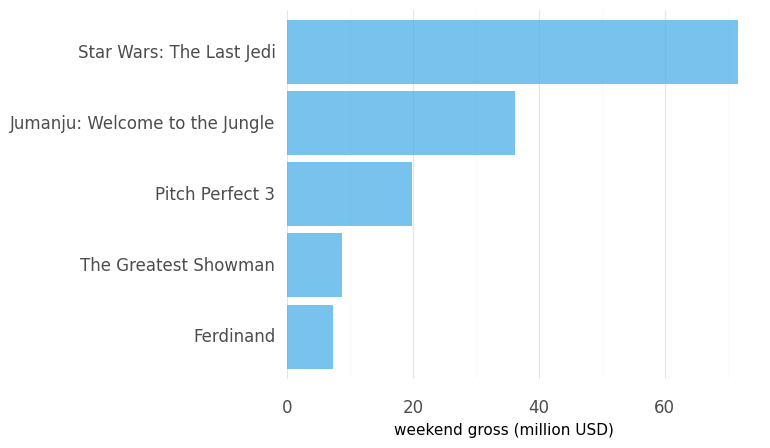

<ggplot: (123917583294)>

In [518]:
# Insert code here for Fig. 6.2
# Remember to print the visual 

pos = tab61.sort_values('Rank')['Title'][::-1]
tab61 = tab61.assign(TitleCat = pd.Categorical(tab61['Title'],
                                categories=pos))

(
    ggplot(tab61, aes(y='weekend gross (million USD)', x='TitleCat'))
    + geom_bar(stat='identity', fill=cbPalette[1], alpha=0.8)
    + coord_flip()
    + theme_minimal()
    + theme(panel_grid_major_y=element_blank(),
            axis_title_y=element_blank(),
            axis_text=element_text(size=12),
            axis_text_y=element_text(margin={'r':-20}))
)

### Question 4.2 

Often we want to highlight a specific column in a barplot. Using the same layout as in the most recent plot highlight the column of Jumanji in orange, and keep the remaining columns grey.

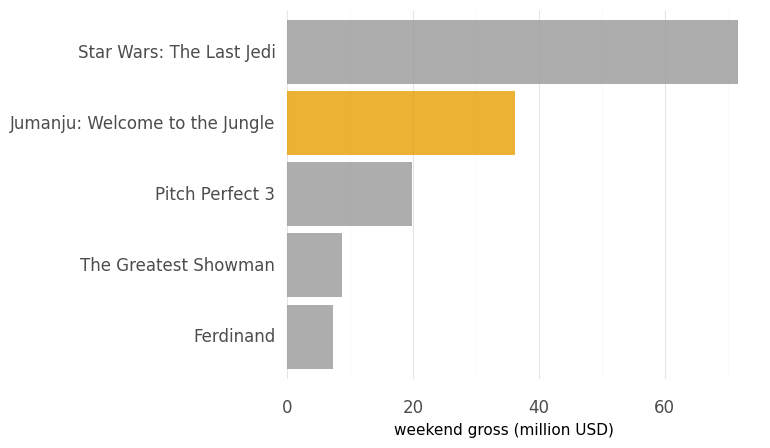

<ggplot: (123912572127)>

In [546]:
# Insert code here 
# Remember to print the visual 
tab61['Filled'] = ["0", "1", "0", "0", "0"]
(
    ggplot(tab61, aes(y='weekend gross (million USD)', x='TitleCat', fill='Filled'))
    + geom_bar(stat='identity', alpha=0.8)
    + scale_fill_manual(values=[cbPalette[7], cbPalette[0]])
    + coord_flip()
    + theme_minimal()
    + theme(panel_grid_major_y=element_blank(),
            legend_position='none',
            axis_title_y=element_blank(),
            axis_text=element_text(size=12),
            axis_text_y=element_text(margin={'r':-20}))
)

### Question 4.3

On the webpage I have uploaded a dataset on the number of marriages in Stockholm, Gothenburg, Malmo and rest of Sweden for 2020, 2015, 2010 and 2005. Using this dataset produce i) a visual where it is easy to see which year Stockholm had the second most marriages, and ii) a visual where it is easy to see how many more marriages there was in Stockholm compared to Gothenburg in 2015. **In each visual I want you to include the number of marriages for each city and year**. 

In [520]:
mar = pd.read_csv('Marriage.csv')
mar

,region,number_marriges,year
0,Stockholm,949,2020
1,Gothenburg,481,2020
2,Malmo,297,2020
3,Rest_of_sweden,2359,2020
4,Stockholm,1960,2015
5,Gothenburg,681,2015
6,Malmo,467,2015
7,Rest_of_sweden,3603,2015
8,Stockholm,1995,2010
9,Gothenburg,710,2010


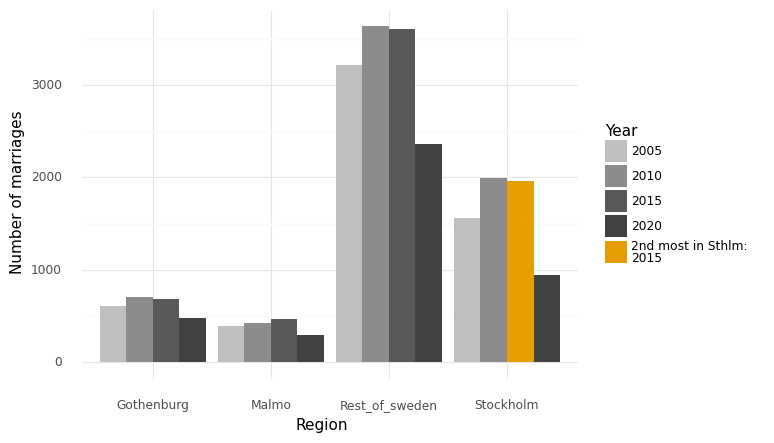

<ggplot: (123915648139)>

In [521]:
# Insert code here for part i)
# Remember to print the visual 
mar['Year'] = ["2020", "2020", "2020", "2020", "2nd most in Sthlm:\n2015", "2015", "2015", "2015", "2010", "2010", "2010", "2010", "2005", "2005", "2005", "2005"] 

grays = ['#bfbfbf', '#8c8c8c', '#595959', '#424242']
col = [grays[0], grays[1], grays[2], grays[3], cbPalette[0]]

(
    ggplot(mar, aes(x='region', y='number_marriges', group='factor(year)', fill='Year'))
    + geom_bar(stat='identity', position='dodge')
    + scale_fill_manual(values=col)
    + theme_minimal()
    + labs(x='Region', y='Number of marriages')
)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1272\3671810735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Admin\AppData\Local\Temp\ipykernel_1272\3671810735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


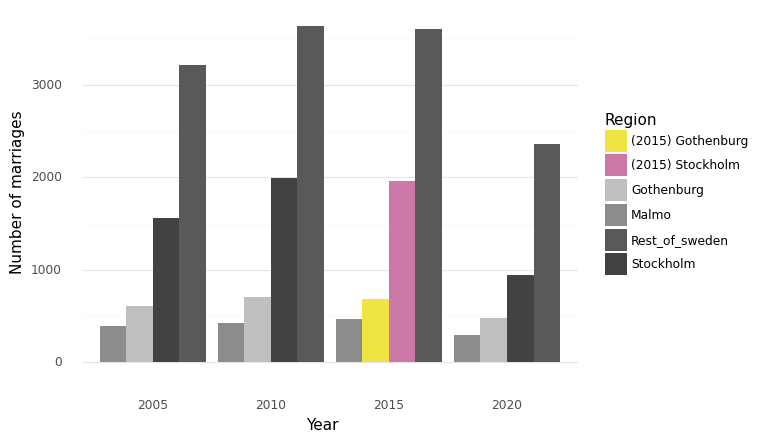

<ggplot: (123917994376)>

In [522]:
# Insert code here for part ii) (see how many more marriages in sthlm than gbg in 2015)
# Remember to print the visual 
col2 = [cbPalette[3], cbPalette[6], grays[0], grays[1], grays[2], grays[3]] #TODO Change grays to something non-quantitative (Maybe washed colors, strong for focus?)

mar['Region'] = mar['region']
mar['Region'].iloc[4] = '(2015) Stockholm'
mar['Region'].iloc[5] = '(2015) Gothenburg'
(
    ggplot(mar, aes(x='factor(year)', y='number_marriges', group='number_marriges', fill='Region'))
    + geom_bar(stat='identity', position='dodge')
    + scale_fill_manual(values=col2)
    + theme_minimal()
    + labs(x='Year', y='Number of marriages')
    + theme(panel_grid_major_x=element_blank())
)

### Question 4.4

When plotting the mobile operating system data in the lectures I used usied a classical barplot. Another way which makes it easy to track the trend over several years or across companies is a common line-plot. Using the dataset on the webpage recreate the present on the webpage.

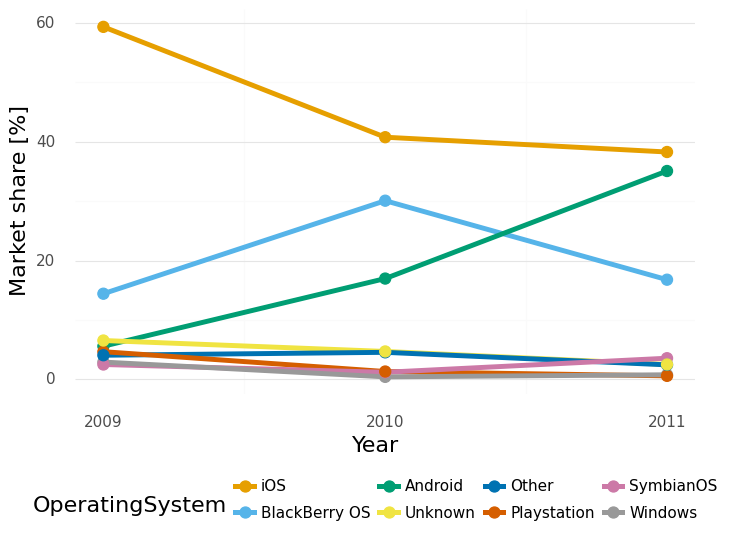

<ggplot: (123913595504)>

In [523]:
# Insert code here 
# Remember to print the visual 

osd = pd.read_csv('mobile_os_market_share.csv')
osd91011 = osd.query('Year == 2009 or Year == 2010 or Year == 2011')
pos = ["iOS","BlackBerry OS", "Android", "Unknown", "Other", "Playstation", "SymbianOS", "Windows"]
osd91011 = osd91011.assign(OperatingSystemCat = pd.Categorical(osd91011["OperatingSystem"], 
                                                        categories=pos))

(
    ggplot(osd91011, aes(x='Year', y='Share', color='OperatingSystemCat'))
    + geom_line(size=2)
    + geom_point(size=4)
    + theme_minimal()
    + scale_color_manual(values=cbPalette, guide=guide_legend(title_position='left'))
    #+ scale_x_discrete(limits=[2009,2010,2011])
    + scale_x_continuous(breaks=[2009,2010,2011])
    + labs(x='Year', y='Market share [%]', color='OperatingSystem', size=24)
    + theme(
        panel_grid_major_x=element_blank(),
        figure_size=(8,5),
        legend_position=(0.5,-0.1),
        legend_title_align='center',
        axis_text=element_text(size=11),
        axis_title=element_text(size=16),
        legend_text=element_text(size=11),
        legend_title=element_text(size=16)
    )
)

### Question 4.5

In the lecture I provided data on European nations median lifespan. Now using the full dataset (on the webpage) provided on the webpage select a subset of countries and visualize i) life-expectancy across a timespan of your choice and ii) life expectancy in 2020. Provide a brief motivation for your choice of visual.



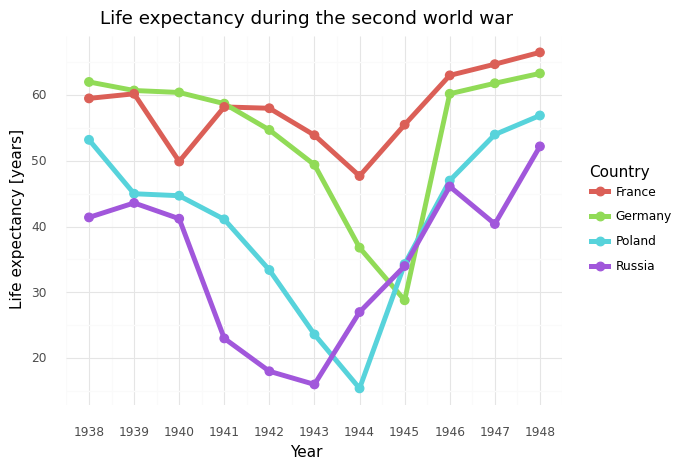

<ggplot: (123914727352)>

In [545]:
# Insert code here for part1 (visualize life-expectancy for a subset of countries)
# Remember to print the visual 

lsp = pd.read_csv('Life_tidy_full.csv')
lsp_sub = lsp.query('Year in [1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948] and country in ["Germany", "Russia", "Poland", "France"]')#'Year == 1938 or Year == 1939 or Year == 1940 or Year == 1941 or Year == 1942 or Year == 1943 or Year == 1944 or Year == 1945 or Year == 1946 or Year == 1947')#'Year == 2009 or Year == 2010 or Year == 2011')
#pos = ["Germany", "Russia", "Poland", "France"]
#lsp_sub = lsp_sub.assign(CountryCat = pd.Categorical(lsp_sub["country"], categories=pos))

lsp_sub

(
    ggplot(lsp_sub, aes(x='Year', y='Life_expactancy', color='country'))
    + geom_line(size=2)
    + geom_point(size=3)
    + scale_x_continuous(breaks=[1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948])
    + theme_minimal()
    + labs(y='Life expectancy [years]', color='Country', title='Life expectancy during the second world war')
)
# TODO possibly select better colors? 

*Brief motivation*

I wanted to visualize the developments in life expectancy during world war 2 for some allied countries and Germany. The data is discrete per year, so to focus on the message of how the statistic changed during the period I decided to use a plot using lines that connect between the data points. This allows easy understanding and following of the statistic for each country through the years as well as enabling simple comparison between them. Looking at the graph we can as an example quickly see where the life expectancy starts increasing again. 

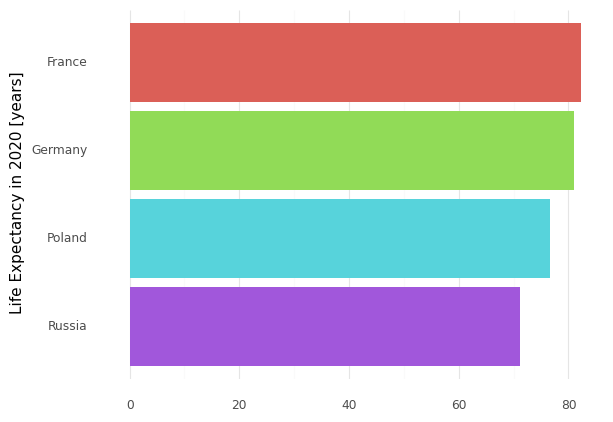

<ggplot: (123903744410)>

In [544]:
# Insert code here for part2 (Life expectancy in 2020)
# Remember to print the visual 

lsp_2020 = lsp.query('Year == 2020 and country in ["Germany", "Russia", "Poland", "France"]')#'Year == 1938 or Year == 1939 or Year == 1940 or Year == 1941 or Year == 1942 or Year == 1943 or Year == 1944 or Year == 1945 or Year == 1946 or Year == 1947')#'Year == 2009 or Year == 2010 or Year == 2011')
pos = lsp_2020.sort_values('Life_expactancy')['country']

lsp_2020 = lsp_2020.assign(CountryCat = pd.Categorical(lsp_2020['country'], categories=pos))

(
    ggplot(lsp_2020, aes(x='CountryCat', y='Life_expactancy', fill='country'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_minimal()
    + labs(x='Life Expectancy in 2020 [years]', y='', fill='')
    + theme(
        panel_grid_major_y=element_blank(),
        legend_position='None'
    )
)

*Brief motivation*

To visualize the countries' life expectancies in 2020 I decided to use a bar plot as this is quick and easy for the eye to grasp. I decided to fill the bars using the same colors as the previous graph to enable comparison between the graphs. This lest us easily grasp that France and Germany have higher life expectancy than Poland and Russia, just as they (generally) did during the war.